In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv('/kaggle/input/air-passengers/AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
df.rename(columns={"#Passengers": "Passengers"}, inplace=True)
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [7]:
df.shape

(144, 2)

In [9]:
df['Month'] = pd.to_datetime(df.Month)
df = df.set_index(df.Month)

In [10]:
df.drop('Month', axis = 1, inplace = True)
print('Column datatypes= \n',df.dtypes)

Column datatypes= 
 Passengers    int64
dtype: object


In [11]:
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


# Time Series Characteristics 

## Trend

Text(0.5, 1.0, 'Trend of the Time Series')

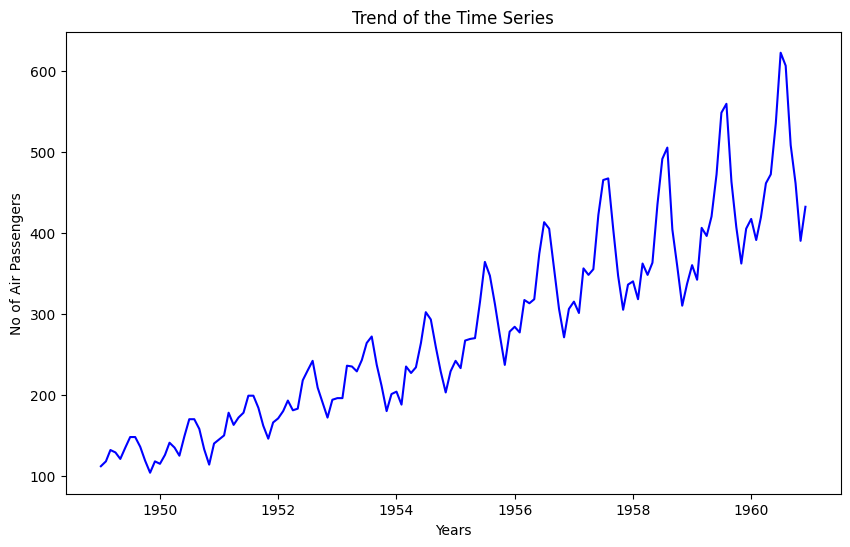

In [14]:
plt.figure(figsize= (10,6))
plt.plot(df, color="blue")
plt.xlabel('Years')
plt.ylabel('No of Air Passengers')
plt.title('Trend of the Time Series')

## Seasonality

In [15]:
# To plot the seasonality we are going to create a temp dataframe and add columns for Month and Year values
df_temp = df.copy()
df_temp['Year'] = pd.DatetimeIndex(df_temp.index).year
df_temp['Month'] = pd.DatetimeIndex(df_temp.index).month

<Axes: title={'center': 'Seasonality of the Time Series'}, xlabel='Month', ylabel='Passengers'>

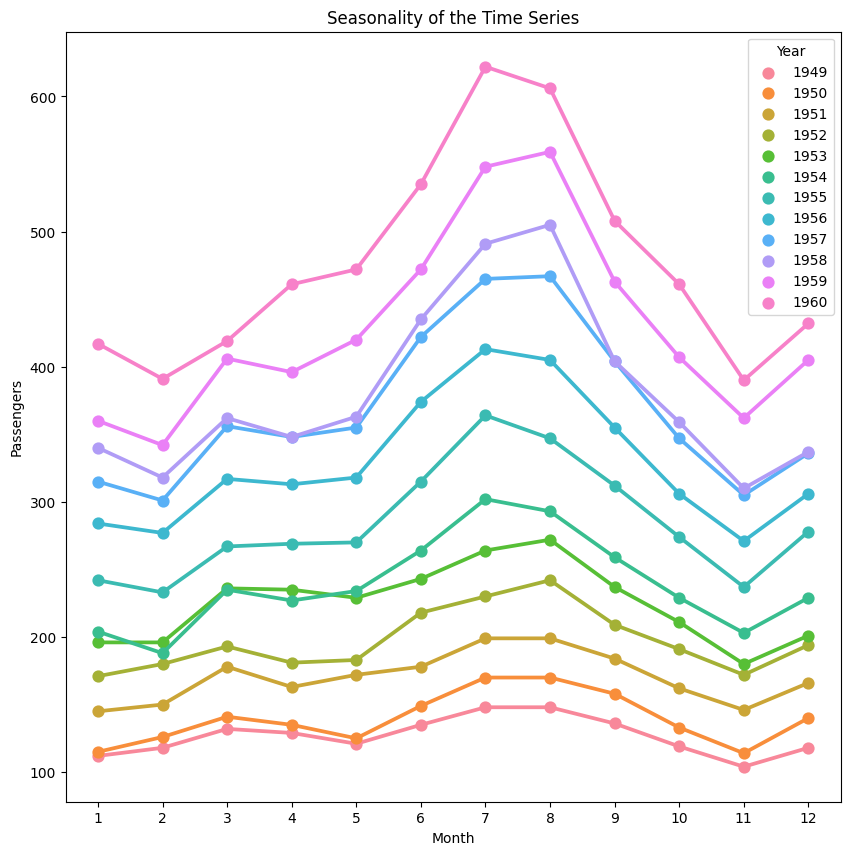

In [16]:
# Stacked line plot
plt.figure(figsize=(10,10))
plt.title('Seasonality of the Time Series')
sns.pointplot(x='Month',y='Passengers',hue='Year',data=df_temp)

## Decomposition of Time Series

In [20]:
# Decompose the time series into trend, seasonality, and residuals
decomposition = seasonal_decompose(df['Passengers'], model='additive')

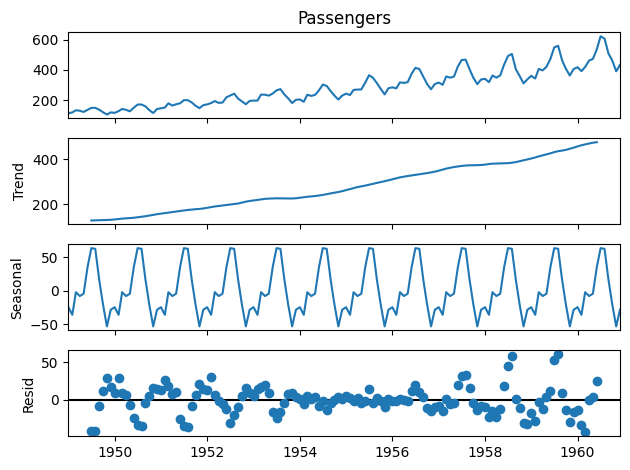

In [21]:
fig = decomposition.plot()

# Time Series Analysis

## Check for Stationarity

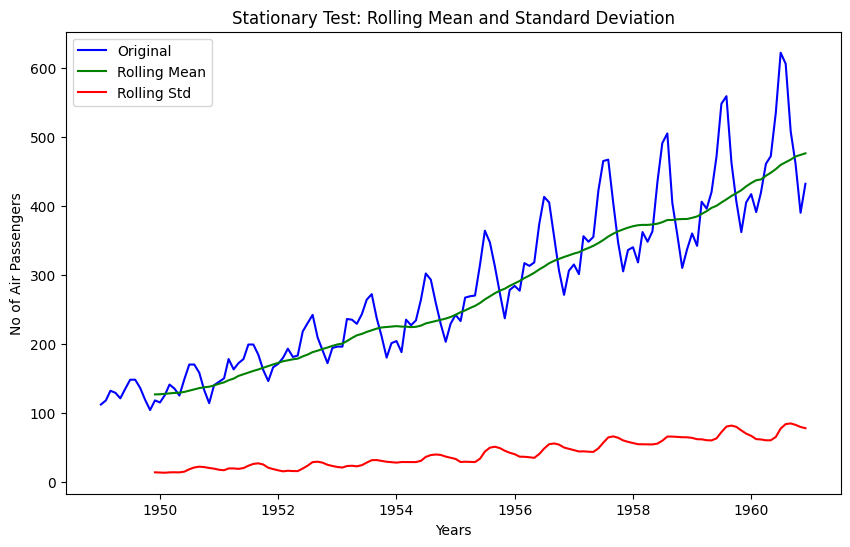

Results of Dickey-Fuller Test
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [34]:
from statsmodels.tsa.stattools import adfuller
timeseries = df['Passengers']

def stationarity_test(timeseries):
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(10, 6))
    plt.xlabel('Years')
    plt.ylabel('No of Air Passengers')
    plt.title('Stationary Test: Rolling Mean and Standard Deviation')
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolling_mean, color='green', label='Rolling Mean')
    plt.plot(rolling_std, color='red', label='Rolling Std')
    plt.legend()
    plt.show()

    # Dickey-Fuller test
    print('Results of Dickey-Fuller Test')
    df_test = adfuller(timeseries)
    df_output = pd.Series(df_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in df_test[4].items():
        df_output['Critical Value (%s)' % key] = value
    print(df_output)

    return rolling_mean, rolling_std

# Call the stationarity_test function with your time series
rolling_mean, rolling_std = stationarity_test(timeseries)


# Convert Non-Stationary Data to Stationary Data

## Differencing

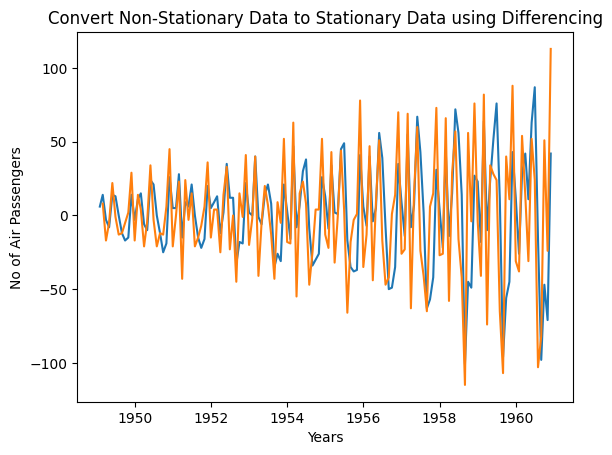

In [44]:
from statsmodels.tsa.stattools import adfuller

df_diff = df.diff(periods=1)  # First-order differencing

# Plot differenced time series
plt.xlabel('Years')
plt.ylabel('No of Air Passengers')    
plt.title('Convert Non-Stationary Data to Stationary Data using Differencing')
plt.plot(df_diff)

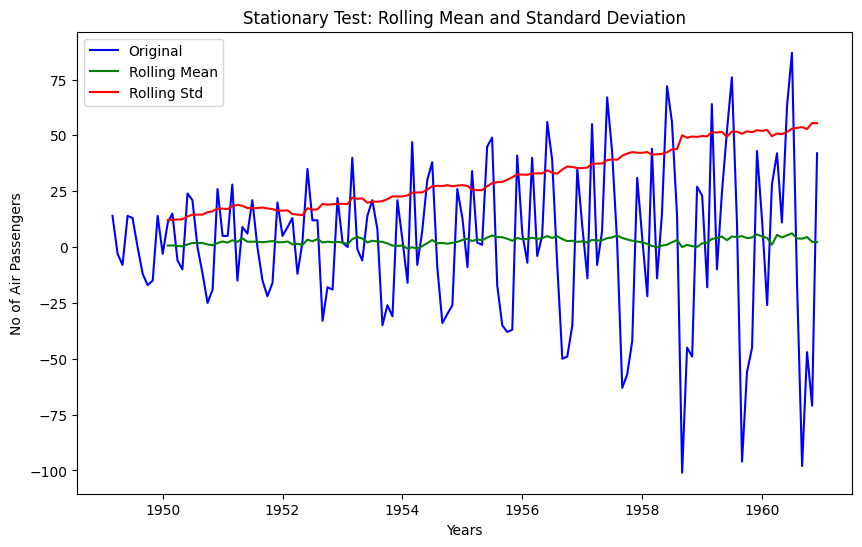

Results of Dickey-Fuller Test
Test Statistic                  -2.833426
p-value                          0.053655
#Lags Used                      12.000000
Number of Observations Used    129.000000
Critical Value (1%)             -3.482088
Critical Value (5%)             -2.884219
Critical Value (10%)            -2.578864
dtype: float64


(Month
 1949-03-01         NaN
 1949-04-01         NaN
 1949-05-01         NaN
 1949-06-01         NaN
 1949-07-01         NaN
                 ...   
 1960-08-01    3.916667
 1960-09-01    3.750000
 1960-10-01    4.500000
 1960-11-01    2.333333
 1960-12-01    2.250000
 Name: Passengers, Length: 142, dtype: float64,
 Month
 1949-03-01          NaN
 1949-04-01          NaN
 1949-05-01          NaN
 1949-06-01          NaN
 1949-07-01          NaN
                 ...    
 1960-08-01    53.364030
 1960-09-01    53.706483
 1960-10-01    52.852281
 1960-11-01    55.531045
 1960-12-01    55.465182
 Name: Passengers, Length: 142, dtype: float64)

In [46]:
# Drop NA values
df_diff.dropna(inplace=True)

# Perform the Dickey-Fuller test on a specific column, e.g., 'Passengers'
column_name = 'Passengers'
stationarity_test(df_diff[column_name])